# Análisis de Hiperparámetros para Ajedrez Vikingo

En este notebook, analizaremos los datos proporcionados para determinar la mejor configuración de hiperparámetros para los jugadores de ajedrez, diferenciando entre las blancas y las negras.

## MCTS 

### Lectura de datos

In [61]:
import pandas as pd

df = pd.read_csv('./result_mcts.csv')
df.head()

,simulations_number_whites,exploration_factor_whites,simulations_number_blacks,exploration_factor_blacks,average_time_whites,chess_pieces_whites,average_time_blacks,chess_pieces_blacks,result
0,100,1.0,100,0.0,0.950926,8.0,0.950926,3,Ganan blancas
1,100,1.0,100,0.0,1.017034,3.0,1.017034,6,Ganan blancas
2,100,1.0,100,0.0,1.089101,1.0,1.089101,6,Ganan negras
3,100,1.0,100,0.0,1.042461,3.0,1.042461,0,Ganan negras
4,100,1.0,100,0.0,1.067558,7.0,1.067558,3,Ganan blancas


### Visualización

In [62]:
from math import sqrt

agentes = {
    1: {
        "simulations_number": 100,
        "exploration_factor": 1,
    },
    2: {
        "simulations_number": 100,
        "exploration_factor": 0,
    },
    3: {
        "simulations_number": 100,
        "exploration_factor": 0.5,
    },
    4: {
        "simulations_number": 200,
        "exploration_factor": 1 / sqrt(2),
        
    },
}

Cada agente tiene un número de simulaciones y un factor de exploración. El número de simulaciones indica cuántas simulaciones se realizarán para cada movimiento posible en cada turno. El factor de exploración indica la importancia relativa de la exploración (movimientos aleatorios) frente a la explotación (movimientos basados en la experiencia). Se ha enfrentado entre sí a cada agente, alternando el color de las fichas en cada partida.

In [63]:
d = {}

for a in agentes:
    d['{}_whites'.format(a)] = df[(df['result'] == 'Ganan blancas') & (df['simulations_number_whites'] == agentes[a]['simulations_number']) & (df['exploration_factor_whites'] == agentes[a]['exploration_factor'])]
    d['{}_blacks'.format(a)] = df[(df['result'] == 'Ganan negras') & (df['simulations_number_blacks'] == agentes[a]['simulations_number']) & (df['exploration_factor_blacks'] == agentes[a]['exploration_factor'])]
    
d

{'1_whites':     simulations_number_whites  exploration_factor_whites  \
 0                         100                        1.0   
 1                         100                        1.0   
 4                         100                        1.0   
 5                         100                        1.0   
 6                         100                        1.0   
 7                         100                        1.0   
 8                         100                        1.0   
 9                         100                        1.0   
 10                        100                        1.0   
 11                        100                        1.0   
 12                        100                        1.0   
 
     simulations_number_blacks  exploration_factor_blacks  average_time_whites  \
 0                         100                   0.000000             0.950926   
 1                         100                   0.000000             1.017034   
 4      

In [64]:
d1 = d.copy()

for i in d1:
    d1[i] = len(d1[i])
    
d1

{'1_whites': 11,
 '1_blacks': 0,
 '2_whites': 13,
 '2_blacks': 5,
 '3_whites': 12,
 '3_blacks': 2,
 '4_whites': 12,
 '4_blacks': 5}

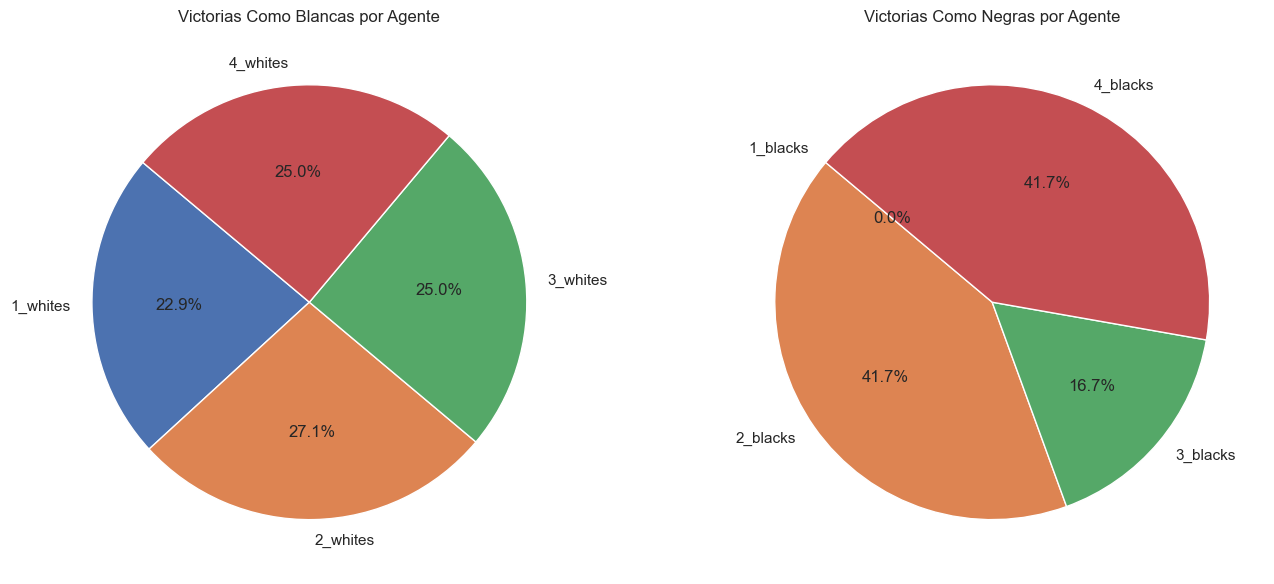

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

whites_wins = {k: v for k, v in d1.items() if 'whites' in k}
blacks_wins = {k: v for k, v in d1.items() if 'blacks' in k}

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].pie(whites_wins.values(), labels=whites_wins.keys(), autopct='%1.1f%%', startangle=140)
axs[0].set_title('Victorias Como Blancas por Agente')

axs[1].pie(blacks_wins.values(), labels=blacks_wins.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title('Victorias Como Negras por Agente')

plt.tight_layout()
plt.show()

Se puede observar que agente ha conseguido más victorias; para las blancas el agente 2 es el ganador, mientras que para las negras hay un empate entre el agente 4 y 2.

In [66]:
d = {}

for a in agentes:
    d['{}_whites'.format(a)] = df[(df['simulations_number_whites'] == agentes[a]['simulations_number']) & (df['exploration_factor_whites'] == agentes[a]['exploration_factor'])]
    d['{}_blacks'.format(a)] = df[(df['simulations_number_blacks'] == agentes[a]['simulations_number']) & (df['exploration_factor_blacks'] == agentes[a]['exploration_factor'])]
    
d

{'1_whites':     simulations_number_whites  exploration_factor_whites  \
 0                         100                        1.0   
 1                         100                        1.0   
 2                         100                        1.0   
 3                         100                        1.0   
 4                         100                        1.0   
 5                         100                        1.0   
 6                         100                        1.0   
 7                         100                        1.0   
 8                         100                        1.0   
 9                         100                        1.0   
 10                        100                        1.0   
 11                        100                        1.0   
 12                        100                        1.0   
 13                        100                        1.0   
 14                        100                        1.0   
 
     simul

In [67]:
d2 = d.copy()

for i in d2:
    
    color = 'blacks'
    
    if 'whites' in i:
        color = 'whites'
    
    d2[i] = d2[i]['chess_pieces_{}'.format(color)].mean()
    
d2

{'1_whites': 4.333333333333333,
 '1_blacks': 3.6666666666666665,
 '2_whites': 3.8666666666666667,
 '2_blacks': 3.6666666666666665,
 '3_whites': 5.4,
 '3_blacks': 3.933333333333333,
 '4_whites': 6.066666666666666,
 '4_blacks': 4.666666666666667}

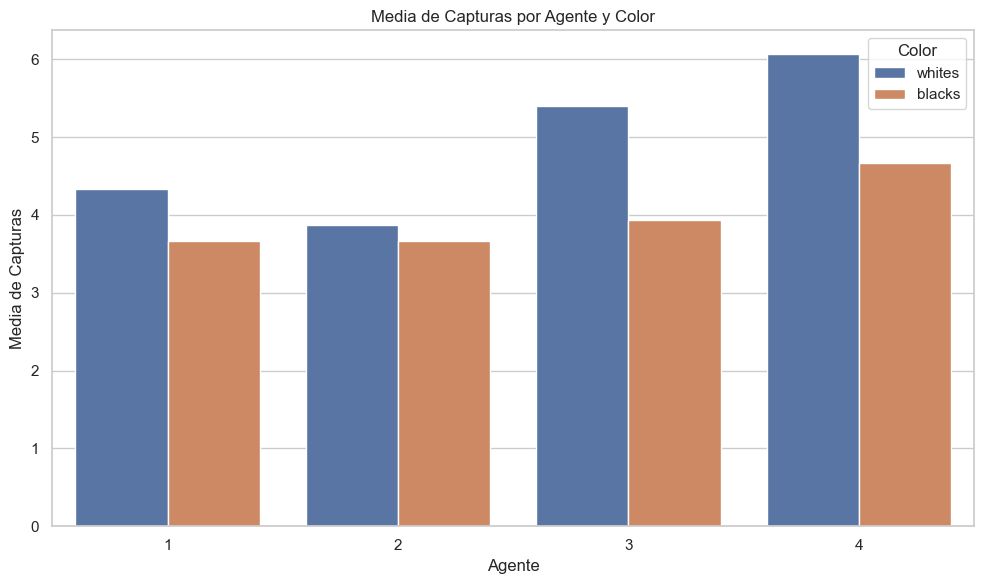

In [68]:
d2_df = pd.DataFrame(list(d2.items()), columns=['Agente_Color', 'Media_Capturas'])

d2_df[['Agente', 'Color']] = d2_df['Agente_Color'].str.split('_', expand=True)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Agente', y='Media_Capturas', hue='Color', data=d2_df)

plt.title('Media de Capturas por Agente y Color')
plt.xlabel('Agente')
plt.ylabel('Media de Capturas')
plt.legend(title='Color')

plt.tight_layout()
plt.show()

In [69]:
d3 = d.copy()

for i in d3:
    color = 'blacks'
    
    if 'whites' in i:
        color = 'whites'
    
    d3[i] = d3[i]['average_time_{}'.format(color)].mean()
    
d3

{'1_whites': 0.9928648797733067,
 '1_blacks': 0.7438055917078881,
 '2_whites': 0.7924484677004656,
 '2_blacks': 0.7968042184916196,
 '3_whites': 0.6964698691857342,
 '3_blacks': 0.8327079049202919,
 '4_whites': 0.6725067563623329,
 '4_blacks': 0.7809722579020398}

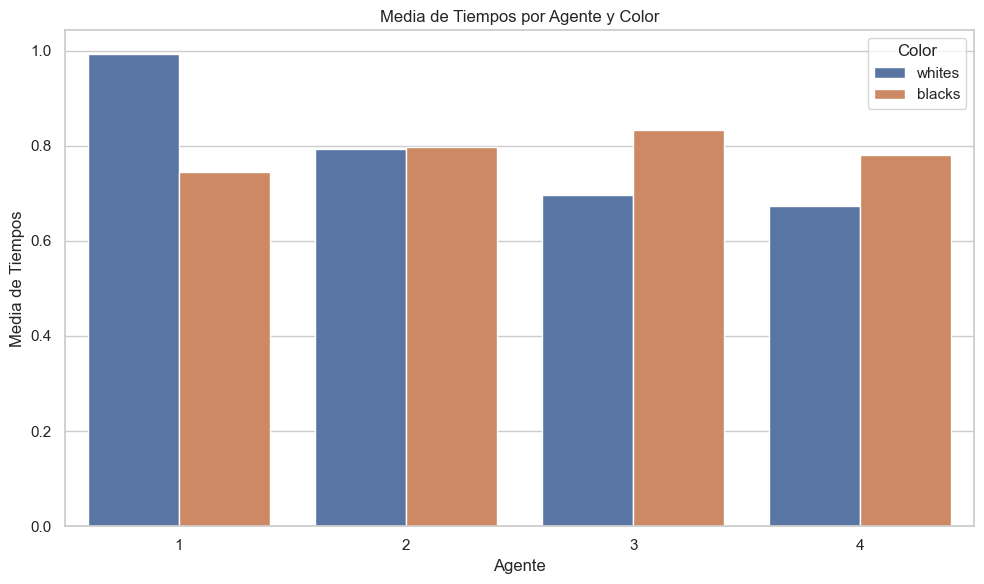

In [70]:
d3_df = pd.DataFrame(list(d3.items()), columns=['Agente_Color', 'Media_Tiempos'])

d3_df[['Agente', 'Color']] = d3_df['Agente_Color'].str.split('_', expand=True)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Agente', y='Media_Tiempos', hue='Color', data=d3_df)

plt.title('Media de Tiempos por Agente y Color')
plt.xlabel('Agente')
plt.ylabel('Media de Tiempos')
plt.legend(title='Color')

plt.tight_layout()
plt.show()

Ahora podemos observar que es el agente 4 el que ha conseguido una mejor media de tiempos para las blancas, y siendo el agente 1 para las negras.

In [71]:
sns.set(style="whitegrid")

def create_scatter_plot(data, x_column, y_column, hue_column, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue_column)
    plt.title(title)
    plt.show()

def create_bar_plot(data, x_column, y_column, hue_column, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x_column, y=y_column, hue=hue_column, errorbar=None)
    plt.title(title)
    plt.show()

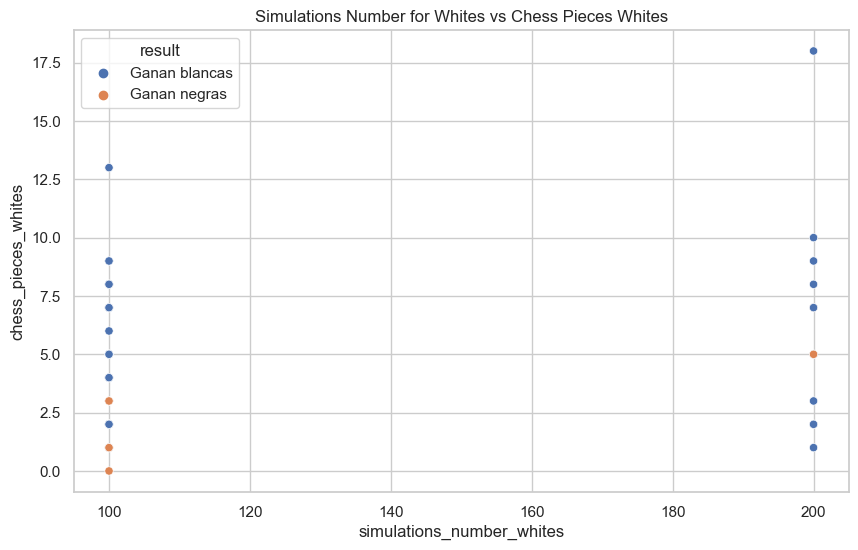

In [72]:
create_scatter_plot(df, 'simulations_number_whites', 'chess_pieces_whites', 'result', 'Simulations Number for Whites vs Chess Pieces Whites')

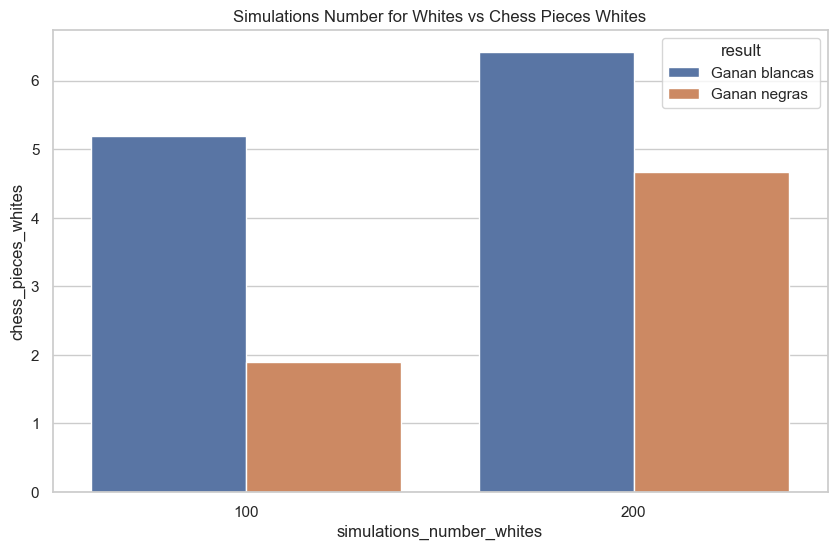

In [73]:
create_bar_plot(df, 'simulations_number_whites', 'chess_pieces_whites', 'result', 'Simulations Number for Whites vs Chess Pieces Whites')

Esta gráfica muestra cómo el número de simulaciones realizadas para las fichas blancas se relaciona con la cantidad de piezas de ajedrez capturadas por las blancas, diferenciando los resultados de las partidas

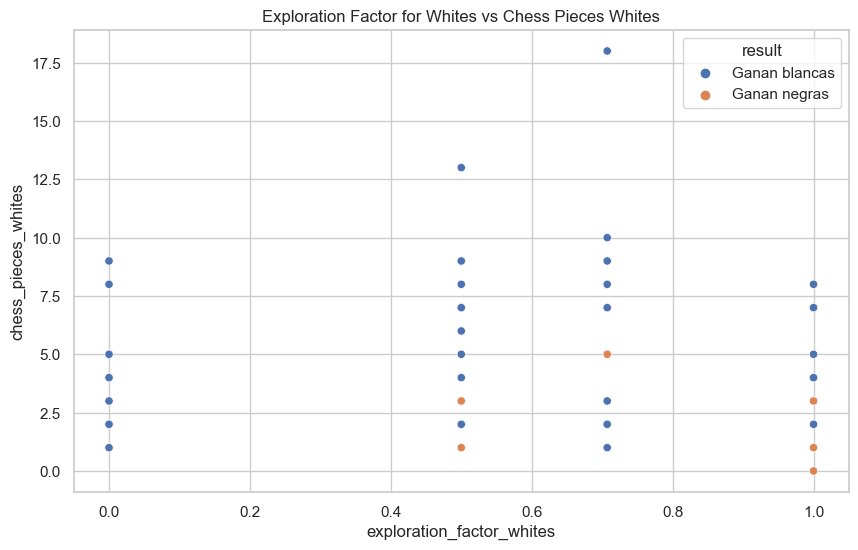

In [74]:
create_scatter_plot(df, 'exploration_factor_whites', 'chess_pieces_whites', 'result', 'Exploration Factor for Whites vs Chess Pieces Whites')

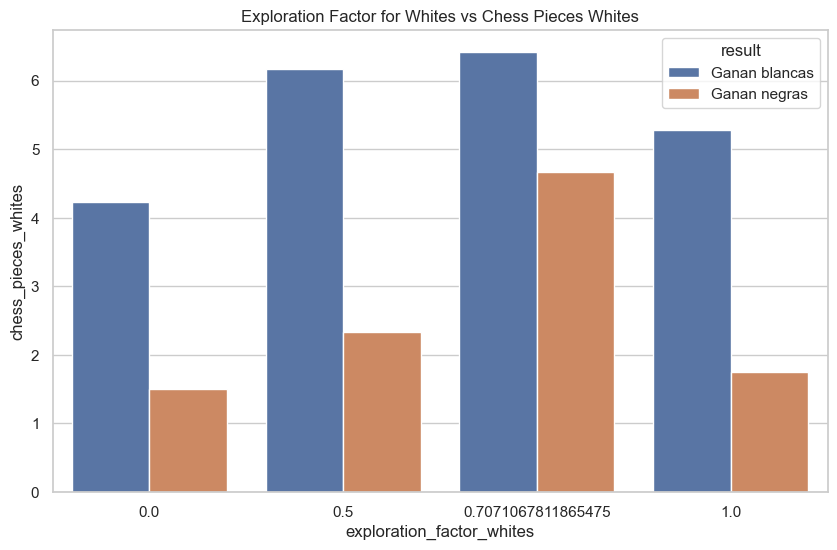

In [75]:
create_bar_plot(df, 'exploration_factor_whites', 'chess_pieces_whites', 'result', 'Exploration Factor for Whites vs Chess Pieces Whites')

Esta gráfica muestra la relación entre el factor de exploración para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas, también diferenciando los resultados de las partidas.

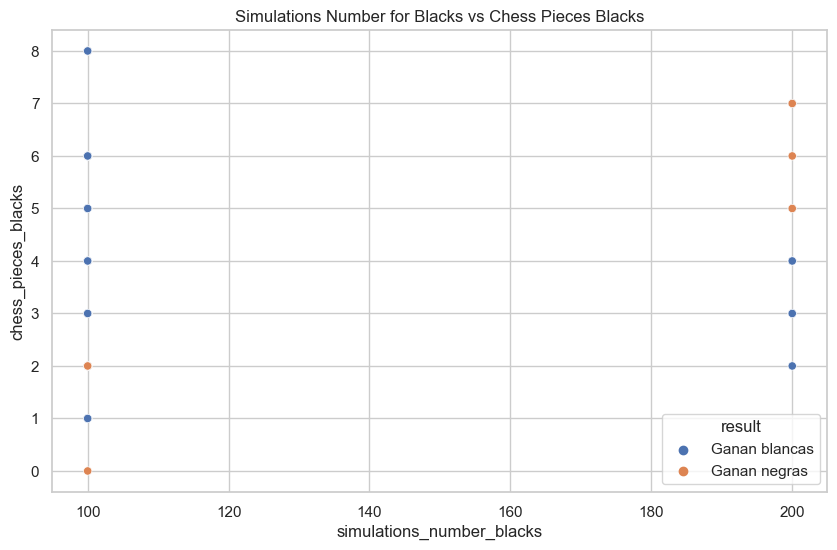

In [76]:
create_scatter_plot(df, 'simulations_number_blacks', 'chess_pieces_blacks', 'result', 'Simulations Number for Blacks vs Chess Pieces Blacks')

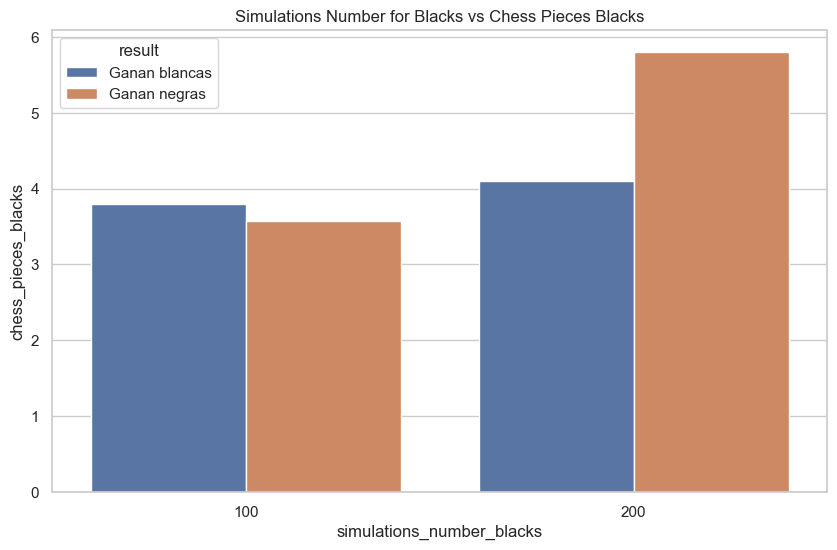

In [77]:
create_bar_plot(df, 'simulations_number_blacks', 'chess_pieces_blacks', 'result', 'Simulations Number for Blacks vs Chess Pieces Blacks')

Similar a la primera gráfica, pero para las fichas negras. Muestra cómo el número de simulaciones afecta la cantidad de piezas de ajedrez capturadas las negras al final de la partida.

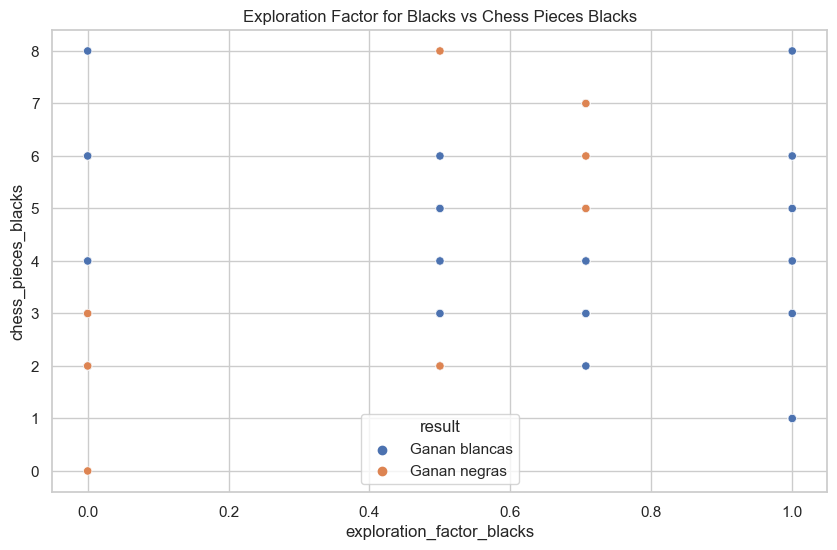

In [78]:
create_scatter_plot(df, 'exploration_factor_blacks', 'chess_pieces_blacks', 'result', 'Exploration Factor for Blacks vs Chess Pieces Blacks')

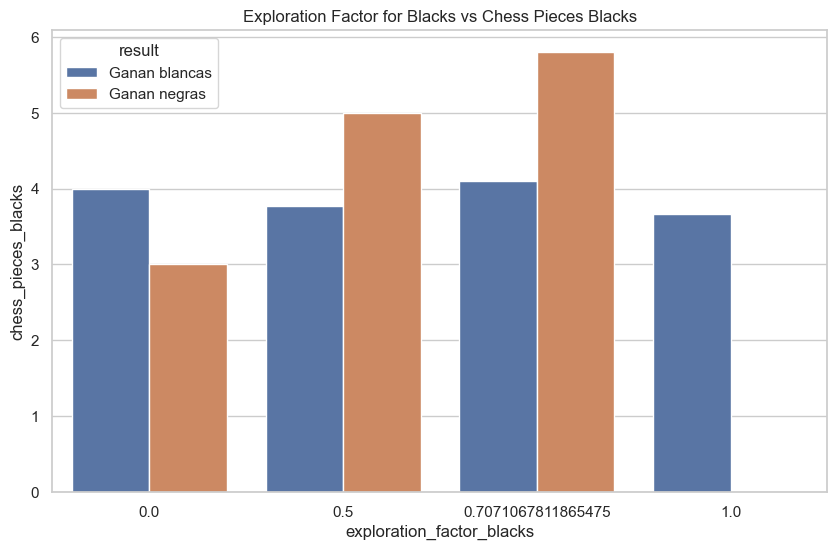

In [79]:
create_bar_plot(df, 'exploration_factor_blacks', 'chess_pieces_blacks', 'result', 'Exploration Factor for Blacks vs Chess Pieces Blacks')

Análoga a la segunda gráfica, pero para las fichas negras. Exhibe la relación entre el factor de exploración y la cantidad de piezas de ajedrez capturadas por las negras, también diferenciando por resultados de partidas.

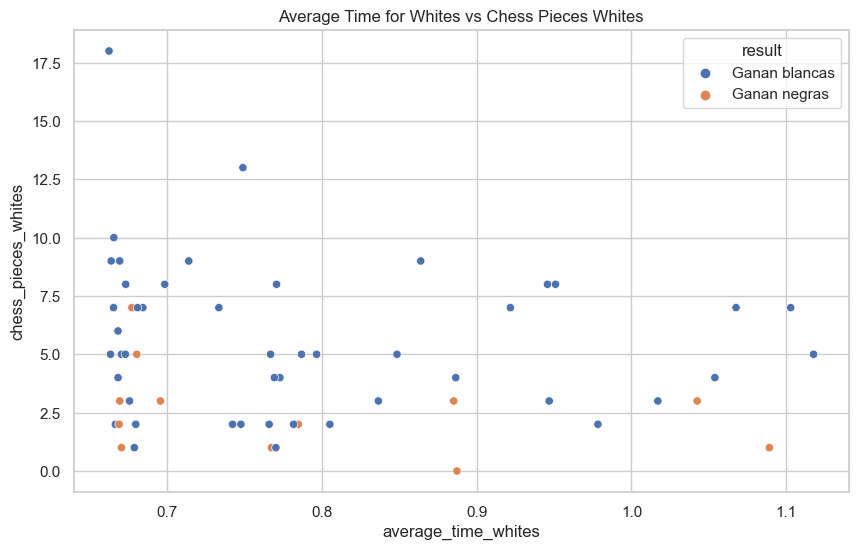

In [80]:
create_scatter_plot(df, 'average_time_whites', 'chess_pieces_whites', 'result', 
                    'Average Time for Whites vs Chess Pieces Whites')

Esta gráfica muestra la relación entre el tiempo promedio de juego para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas al final de la partida. Los diferentes colores representan los distintos resultados de las partidas. Esta gráfica puede ayudar a entender si un juego más largo o más corto beneficia a las blancas en términos de cantidad de piezas restantes o en la probabilidad de ganar la partida.

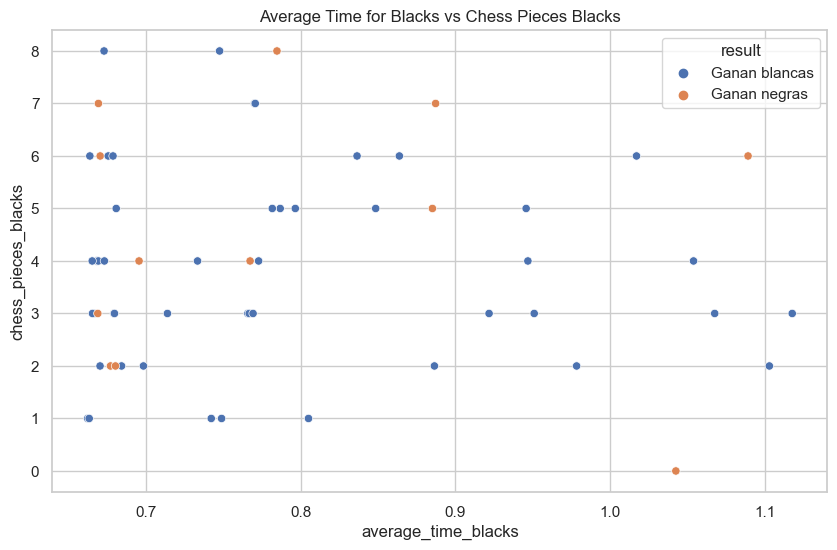

In [81]:
create_scatter_plot(df, 'average_time_blacks', 'chess_pieces_blacks', 'result', 
                    'Average Time for Blacks vs Chess Pieces Blacks')

Similar a la anterior pero para las fichas negras. Muestra cómo el tiempo promedio de juego para las negras se relaciona con la cantidad de piezas de ajedrez capturadas por las negras al final de la partida, también diferenciado por los resultados de las partidas. Esta gráfica es útil para determinar si las partidas más largas o más cortas favorecen a las negras en términos de supervivencia de piezas o victorias.

### Conclusiones

In [82]:
def find_best_hyperparameters(data, color):
    
    if color == 'whites':
        winning_data = data[data['result'] == 'Ganan blancas']
    elif color == 'blacks':
        winning_data = data[data['result'] == 'Ganan negras']
    else:
        return "Color not recognized"

    best_simulations_number = winning_data[f'simulations_number_{color}'].mode()[0]
    best_exploration_factor = winning_data[f'exploration_factor_{color}'].mode()[0]

    return {
        'best_simulations_number': best_simulations_number,
        'best_exploration_factor': best_exploration_factor
    }

best_hyperparameters_whites = find_best_hyperparameters(df, 'whites')

best_hyperparameters_blacks = find_best_hyperparameters(df, 'blacks')

print('WHITES: {}\nBLACKS: {}'.format(best_hyperparameters_whites,best_hyperparameters_blacks))



WHITES: {'best_simulations_number': 100, 'best_exploration_factor': 0.0}
BLACKS: {'best_simulations_number': 100, 'best_exploration_factor': 0.0}


Estos valores representan las configuraciones más comunes entre los juegos ganados por las fichas blancas y negras, respectivamente. Para las blancas la mejor configuración sería la del agente 2, mientras que para las negras habría que tener en cuenta las gráficas anteriores porque a pesar de que tanto el agente 2 como el 4 habían ganado el mismo porcentaje de partidas el agente 4 había conseguido mejor rendimiento en captura de fichas y tiempo, por lo que para las negras la mejor configuración es el agente 4.

Por tanto, la configuración de blancas sería:
* **Número de simulaciones:** 100
* **Factor de exploración:** 0.0

Y para negras sería:
* **Número de simulaciones:** 100
* **Factor de exploración:** $ \frac{1}{\sqrt{2}} $



## Q-Learning

### Lectura de datos

In [83]:
df = pd.read_csv('./result_qlearning.csv')
df.head()

,learning_rate_whites,initial_epsilon_whites,epsilon_decay_whites,final_epsilon_whites,learning_rate_blacks,initial_epsilon_blacks,epsilon_decay_blacks,final_epsilon_blacks,average_time_whites,chess_pieces_whites,average_time_blacks,chess_pieces_blacks,result
0,0.2,0.9,0.85,0.05,0.05,0.5,0.95,0.2,0.000138,1.0,0.000138,8.0,Ganan negras
1,0.2,0.9,0.85,0.05,0.05,0.5,0.95,0.2,0.000126,6.0,0.000126,4.0,Ganan negras
2,0.2,0.9,0.85,0.05,0.05,0.5,0.95,0.2,0.000123,7.0,0.000123,3.0,Ganan blancas
3,0.2,0.9,0.85,0.05,0.05,0.5,0.95,0.2,0.000125,11.0,0.000125,5.0,Ganan blancas
4,0.2,0.9,0.85,0.05,0.05,0.5,0.95,0.2,0.000123,4.0,0.000123,5.0,Ganan negras


### Visualización 

In [84]:
agentes = {
    1: {
        "learning_rate": 0.2,
        "initial_epsilon": 0.9,
        "epsilon_decay": 0.85,
        "final_epsilon": 0.05
    },
    2: {
        "learning_rate": 0.05,
        "initial_epsilon": 0.5,
        "epsilon_decay": 0.95,
        "final_epsilon": 0.2
    },
    3: {
        "learning_rate": 0.15,
        "initial_epsilon": 0.8,
        "epsilon_decay": 0.92,
        "final_epsilon": 0.1
    },
    4: {
        "learning_rate": 0.07,
        "initial_epsilon": 0.7,
        "epsilon_decay": 0.97,
        "final_epsilon": 0.15
    }
}

Para cada agente se ha definido una tasa de aprendizaje, un valor inicial de epsilon, un factor de decaimiento de epsilon y un valor final de epsilon. La tasa de aprendizaje indica la importancia relativa de los nuevos conocimientos frente a los antiguos. El valor inicial de epsilon indica la importancia relativa de la exploración (movimientos aleatorios) frente a la explotación (movimientos basados en la experiencia) al comienzo del entrenamiento. El factor de decaimiento de epsilon indica la rapidez con la que se reduce la importancia de la exploración a lo largo del entrenamiento. El valor final de epsilon indica la importancia relativa de la exploración al final del entrenamiento. Se ha enfrentado entre sí a cada agente, alternando el color de las fichas en cada partida.

In [85]:
d = {}

for a in agentes:
    d['{}_whites'.format(a)] = df[(df['result'] == 'Ganan blancas') & (df['learning_rate_whites'] == agentes[a]['learning_rate']) & (df['initial_epsilon_whites'] == agentes[a]['initial_epsilon']) & (df['epsilon_decay_whites'] == agentes[a]['epsilon_decay']) & (df['final_epsilon_whites'] == agentes[a]['final_epsilon'])]
    
    d['{}_blacks'.format(a)] = df[(df['result'] == 'Ganan negras') & (df['learning_rate_blacks'] == agentes[a]['learning_rate']) & (df['initial_epsilon_blacks'] == agentes[a]['initial_epsilon']) & (df['epsilon_decay_blacks'] == agentes[a]['epsilon_decay']) & (df['final_epsilon_blacks'] == agentes[a]['final_epsilon'])]
    
d

{'1_whites':     learning_rate_whites  initial_epsilon_whites  epsilon_decay_whites  \
 2                    0.2                     0.9                  0.85   
 3                    0.2                     0.9                  0.85   
 5                    0.2                     0.9                  0.85   
 6                    0.2                     0.9                  0.85   
 7                    0.2                     0.9                  0.85   
 9                    0.2                     0.9                  0.85   
 10                   0.2                     0.9                  0.85   
 14                   0.2                     0.9                  0.85   
 
     final_epsilon_whites  learning_rate_blacks  initial_epsilon_blacks  \
 2                   0.05                  0.05                     0.5   
 3                   0.05                  0.05                     0.5   
 5                   0.05                  0.15                     0.8   
 6         

In [86]:
d1 = d.copy()

for i in d1:
    d1[i] = len(d1[i])
    
d1

{'1_whites': 8,
 '1_blacks': 8,
 '2_whites': 6,
 '2_blacks': 6,
 '3_whites': 7,
 '3_blacks': 7,
 '4_whites': 8,
 '4_blacks': 9}

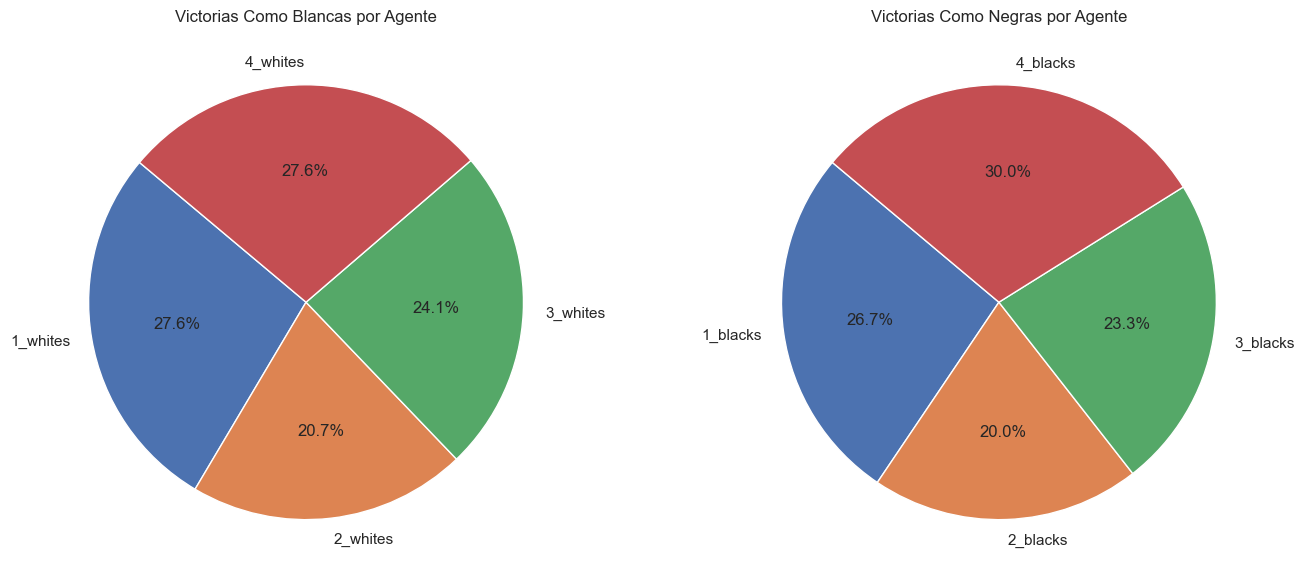

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

whites_wins = {k: v for k, v in d1.items() if 'whites' in k}
blacks_wins = {k: v for k, v in d1.items() if 'blacks' in k}

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].pie(whites_wins.values(), labels=whites_wins.keys(), autopct='%1.1f%%', startangle=140)
axs[0].set_title('Victorias Como Blancas por Agente')

axs[1].pie(blacks_wins.values(), labels=blacks_wins.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title('Victorias Como Negras por Agente')

plt.tight_layout()
plt.show()

Observamos que, de todos los agentes, el agente 1 y 4 son los que han conseguido un mayor porcentaje de partidas ganadas usando las fichas blancas. Mientras, para las negras el agente 4 es el que ha conseguido un mayor número de victorias.

In [89]:
d = {}

for a in agentes:
    d['{}_whites'.format(a)] = df[(df['learning_rate_whites'] == agentes[a]['learning_rate']) & (df['initial_epsilon_whites'] == agentes[a]['initial_epsilon']) & (df['epsilon_decay_whites'] == agentes[a]['epsilon_decay']) & (df['final_epsilon_whites'] == agentes[a]['final_epsilon'])]
    
    d['{}_blacks'.format(a)] = df[ (df['learning_rate_blacks'] == agentes[a]['learning_rate']) & (df['initial_epsilon_blacks'] == agentes[a]['initial_epsilon']) & (df['epsilon_decay_blacks'] == agentes[a]['epsilon_decay']) & (df['final_epsilon_blacks'] == agentes[a]['final_epsilon'])]
    
d

{'1_whites':     learning_rate_whites  initial_epsilon_whites  epsilon_decay_whites  \
 0                    0.2                     0.9                  0.85   
 1                    0.2                     0.9                  0.85   
 2                    0.2                     0.9                  0.85   
 3                    0.2                     0.9                  0.85   
 4                    0.2                     0.9                  0.85   
 5                    0.2                     0.9                  0.85   
 6                    0.2                     0.9                  0.85   
 7                    0.2                     0.9                  0.85   
 8                    0.2                     0.9                  0.85   
 9                    0.2                     0.9                  0.85   
 10                   0.2                     0.9                  0.85   
 11                   0.2                     0.9                  0.85   
 12          

In [90]:
d2 = d.copy()

for i in d2:
    
    color = 'blacks'
    
    if 'whites' in i:
        color = 'whites'
    
    d2[i] = d2[i]['chess_pieces_{}'.format(color)].mean()
    
d2

{'1_whites': 5.2,
 '1_blacks': 4.6,
 '2_whites': 4.785714285714286,
 '2_blacks': 5.2,
 '3_whites': 4.0,
 '3_blacks': 4.666666666666667,
 '4_whites': 4.866666666666666,
 '4_blacks': 5.071428571428571}

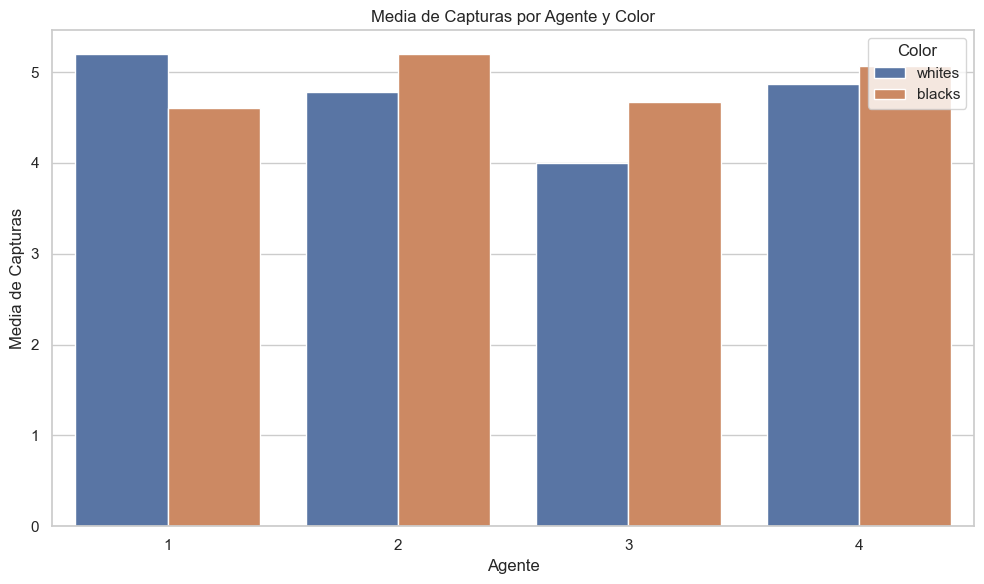

In [91]:
d2_df = pd.DataFrame(list(d2.items()), columns=['Agente_Color', 'Media_Capturas'])

d2_df[['Agente', 'Color']] = d2_df['Agente_Color'].str.split('_', expand=True)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Agente', y='Media_Capturas', hue='Color', data=d2_df)

plt.title('Media de Capturas por Agente y Color')
plt.xlabel('Agente')
plt.ylabel('Media de Capturas')
plt.legend(title='Color')

plt.tight_layout()
plt.show()

Observando la media de capturas por agente y color, podemos ver como el agente 1 es el que mayor media tiene para las blancas, mientras que el agente 2 para las negras.

In [92]:
d3 = d.copy()

for i in d3:
    color = 'blacks'
    
    if 'whites' in i:
        color = 'whites'
    
    d3[i] = d3[i]['average_time_{}'.format(color)].mean()
    
d3

{'1_whites': 0.00013214101397047333,
 '1_blacks': 0.00013576807174096002,
 '2_whites': 0.00013340134371775001,
 '2_blacks': 0.00013540476213764,
 '3_whites': 0.00013555951867996,
 '3_blacks': 0.00013639196269627334,
 '4_whites': 0.00014296665844151332,
 '4_blacks': 0.00013672533784318572}

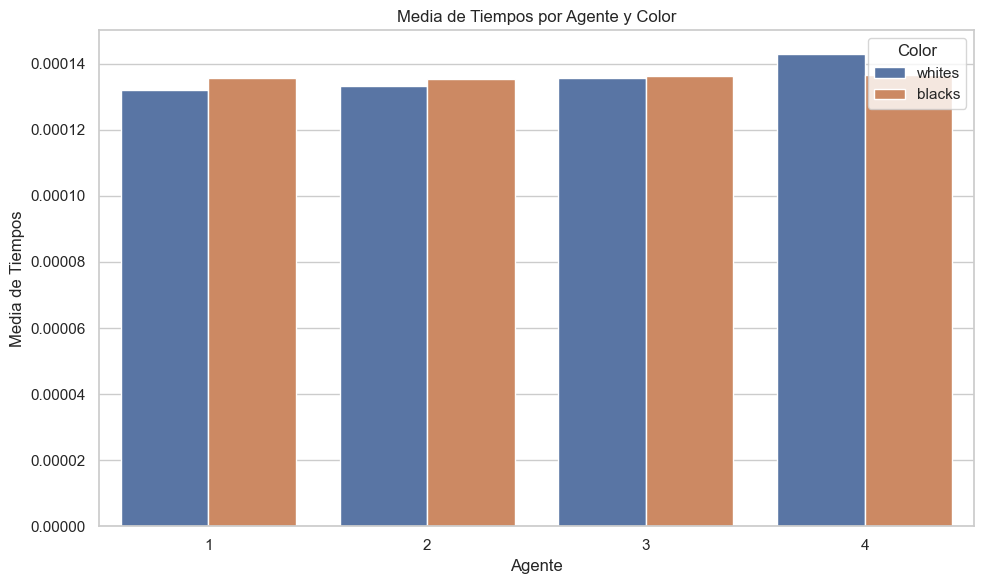

In [93]:
d3_df = pd.DataFrame(list(d3.items()), columns=['Agente_Color', 'Media_Tiempos'])

d3_df[['Agente', 'Color']] = d3_df['Agente_Color'].str.split('_', expand=True)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Agente', y='Media_Tiempos', hue='Color', data=d3_df)

plt.title('Media de Tiempos por Agente y Color')
plt.xlabel('Agente')
plt.ylabel('Media de Tiempos')
plt.legend(title='Color')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Con respecto al tiempo medio para realizar un movimiento, todos han obtenido casi los mismos resultados, diferenciandose por muy poco.

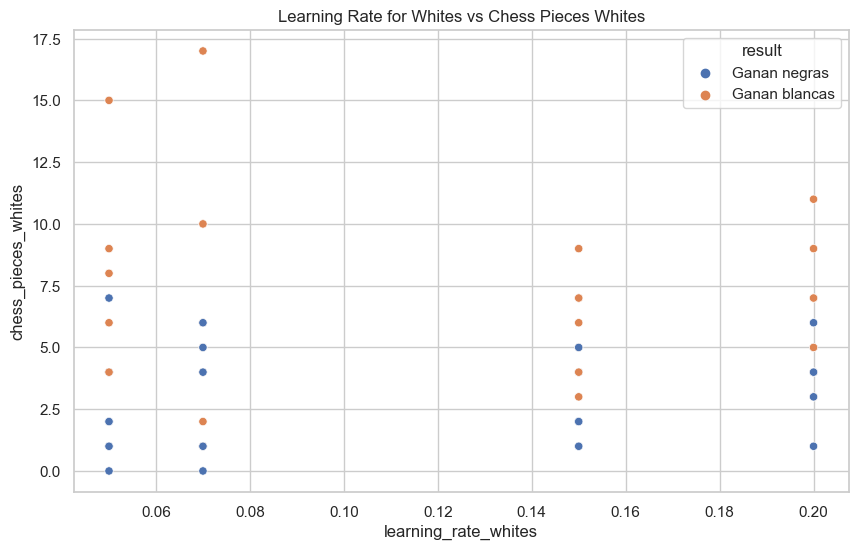

In [95]:
create_scatter_plot(df, 'learning_rate_whites', 'chess_pieces_whites', 'result', 'Learning Rate for Whites vs Chess Pieces Whites')

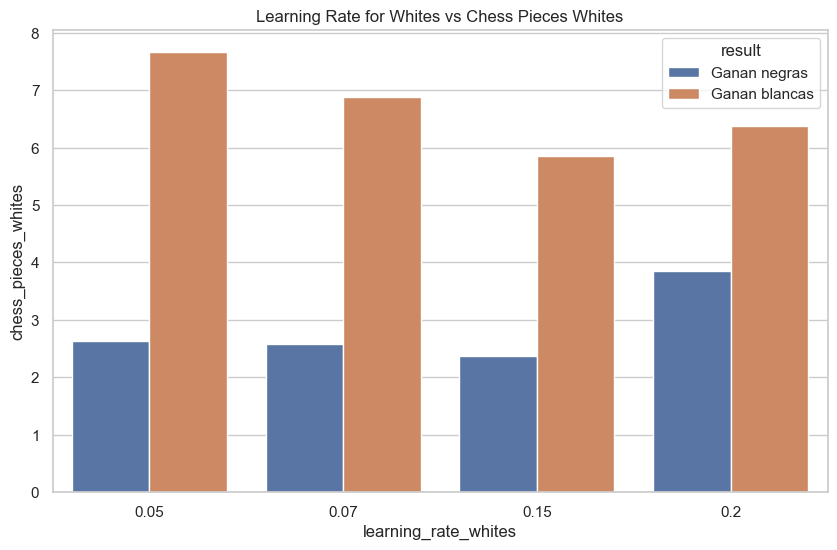

In [96]:
create_bar_plot(df, 'learning_rate_whites', 'chess_pieces_whites', 'result', 'Learning Rate for Whites vs Chess Pieces Whites')

Esta gráfica muestra la relación entre la tasa de aprendizaje para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas, diferenciando los resultados de las partidas. Observamos que a menor learning rate para las blancas mayor número de piezas capturadas, mientras que para las negras con un learning rate de 0.2 se ha conseguido mayor número de piezas capturadas.

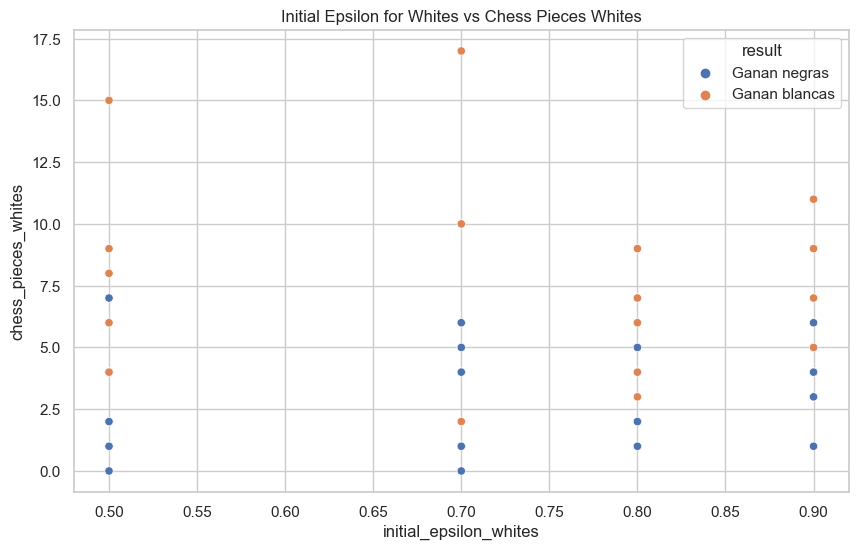

In [97]:
create_scatter_plot(df, 'initial_epsilon_whites', 'chess_pieces_whites', 'result', 'Initial Epsilon for Whites vs Chess Pieces Whites')

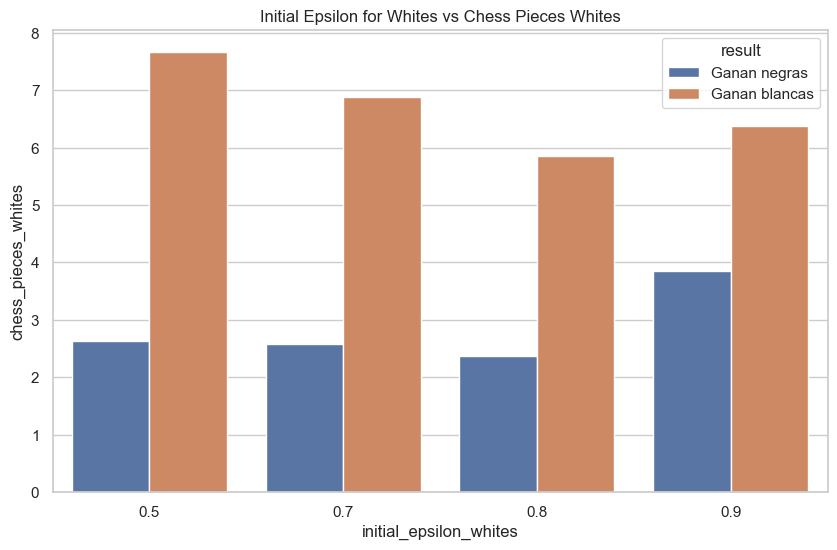

In [98]:
create_bar_plot(df, 'initial_epsilon_whites', 'chess_pieces_whites', 'result', 'Initial Epsilon for Whites vs Chess Pieces Whites')

Esta gráfica muestra la relación entre el valor inicial de epsilon para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas, diferenciando los resultados de las partidas. Observamos que a mayor valor inicial de epsilon para las blancas mayor número de piezas capturadas, mientras que para las negras con un valor inicial de epsilon de 0.9 se ha conseguido mayor número de piezas capturadas.

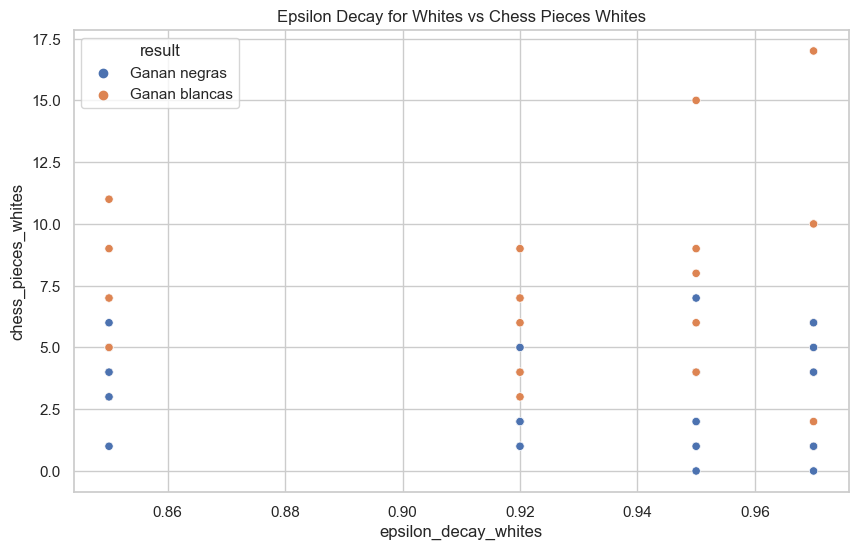

In [99]:
create_scatter_plot(df, 'epsilon_decay_whites', 'chess_pieces_whites', 'result', 'Epsilon Decay for Whites vs Chess Pieces Whites')

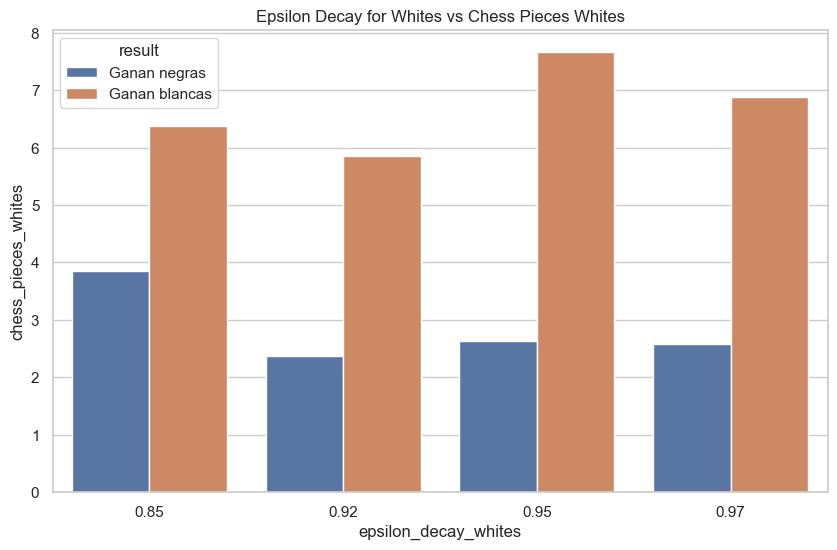

In [100]:
create_bar_plot(df, 'epsilon_decay_whites', 'chess_pieces_whites', 'result', 'Epsilon Decay for Whites vs Chess Pieces Whites')

Esta gráfica muestra la relación entre el factor de decaimiento de epsilon para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas, diferenciando los resultados de las partidas. Observamos que 0.95 como factor de decaimiento es el que ha obtenido capturar un mayor número de piezas para las blancas, mientras que para las negras con un factor de decaimiento de 0.85 se ha conseguido mayor número de piezas capturadas.

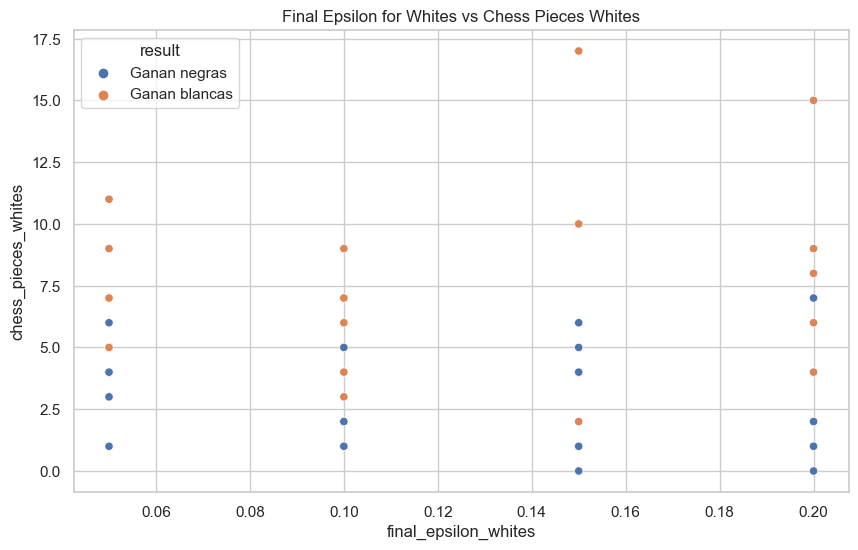

In [101]:
create_scatter_plot(df, 'final_epsilon_whites', 'chess_pieces_whites', 'result', 'Final Epsilon for Whites vs Chess Pieces Whites')

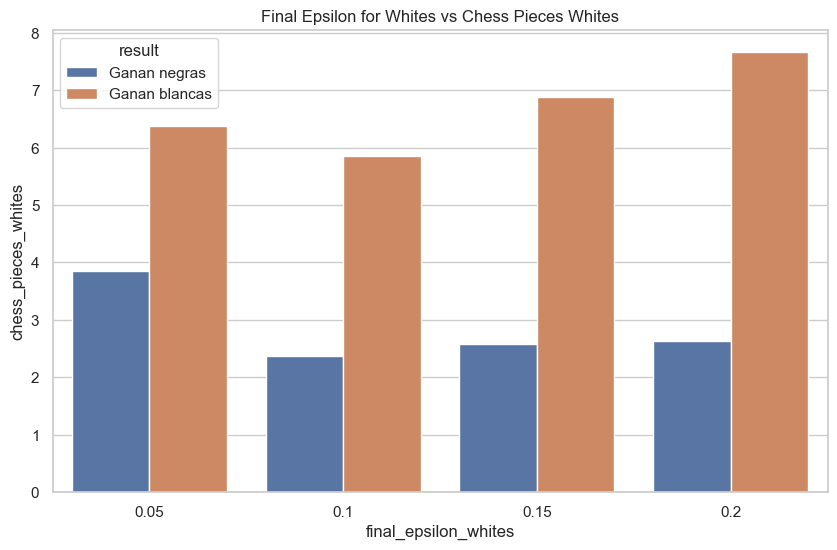

In [102]:
create_bar_plot(df, 'final_epsilon_whites', 'chess_pieces_whites', 'result', 'Final Epsilon for Whites vs Chess Pieces Whites')

Esta gráfica muestra la relación entre el valor final de epsilon para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas, diferenciando los resultados de las partidas. Observamos que a mayor valor final de epsilon para las blancas mayor número de piezas capturadas, mientras que para las negras con un valor final de epsilon de 0.05 se ha conseguido mayor número de piezas capturadas.

### Conclusiones

In [103]:
def find_best_hyperparameters(data, color):
    
    if color == 'whites':
        winning_data = data[data['result'] == 'Ganan blancas']
    elif color == 'blacks':
        winning_data = data[data['result'] == 'Ganan negras']
    else:
        return "Color not recognized"

        
    best_learning_rate = winning_data[f'learning_rate_{color}'].mode()[0]
    best_initial_epsilon = winning_data[f'initial_epsilon_{color}'].mode()[0]
    best_epsilon_decay = winning_data[f'epsilon_decay_{color}'].mode()[0]
    best_final_epsilon = winning_data[f'final_epsilon_{color}'].mode()[0]

    return {
        'best_learning_rate': best_learning_rate,
        'best_initial_epsilon': best_initial_epsilon,
        'best_epsilon_decay': best_epsilon_decay,
        'best_final_epsilon': best_final_epsilon
    }

best_hyperparameters_whites = find_best_hyperparameters(df, 'whites')

best_hyperparameters_blacks = find_best_hyperparameters(df, 'blacks')

print('WHITES: {}\nBLACKS: {}'.format(best_hyperparameters_whites,best_hyperparameters_blacks))



WHITES: {'best_learning_rate': 0.07, 'best_initial_epsilon': 0.7, 'best_epsilon_decay': 0.85, 'best_final_epsilon': 0.05}
BLACKS: {'best_learning_rate': 0.07, 'best_initial_epsilon': 0.7, 'best_epsilon_decay': 0.97, 'best_final_epsilon': 0.15}


Teniendo en cuenta todos los resultados, para las blancas la mejor configuración de hiperparámetros sería la del Agente 1, mientras que para las negras el Agente 4.

Por lo tanto, la configuración de blancas sería:
* *Learning rate:* 0.2
* *Initial epsilon:* 0.9
* *Epsilon decay:* 0.85
* *Final epsilon:* 0.05

Y para las negras:
* *Learning rate:* 0.07
* *Initial epsilon:* 0.7
* *Epsilon decay:* 0.97
* *Final epsilon:* 0.15

## Q-Learning vs MCTS

Comparemos los agentes ganadores resultantes.

### Lectura de datos

In [104]:
df = pd.read_csv('./result_q_mcts.csv')
df.head()

,agent_white,agent_black,average_time_whites,chess_pieces_whites,average_time_blacks,chess_pieces_blacs,result
0,1,4,0.000368,7,1.324514,6,Ganan blancas
1,1,4,0.000403,4,1.452691,3,Ganan blancas
2,1,4,0.000430,16,1.610722,3,Ganan blancas
3,1,4,0.000425,3,1.697882,7,Ganan blancas
4,2,3,1.710668,2,0.000424,6,Ganan blancas


### Vsiualización

Estos son los agentes que hemos utilizado:

In [105]:
agentes = {
    1: {
        "learning_rate": 0.2,
        "initial_epsilon": 0.9,
        "epsilon_decay": 0.85,
        "final_epsilon": 0.05
    },
    3: {
        "learning_rate": 0.07,
        "initial_epsilon": 0.7,
        "epsilon_decay": 0.97,
        "final_epsilon": 0.15
    },
    2: {
        "simulations_number": 100,
        "exploration_factor": 0,
    },
    4: {
        "simulations_number": 200,
        "exploration_factor": 1 / sqrt(2),
    }
}

In [116]:
# Identificar el agente ganador en cada juego
df['winning_agent'] = df.apply(lambda row: row['agent_white'] if row['result'] == 'Ganan blancas' else row['agent_black'], axis=1)

# Agrupar las victorias por agente
victories_by_agent = df['winning_agent'].value_counts().reset_index()
victories_by_agent.columns = ['Agent', 'Victories']

# Identificar todos los agentes únicos
unique_agents = pd.unique(df[['agent_white', 'agent_black']].values.ravel('K'))

# Crear un DataFrame para todos los agentes con victorias inicializadas en 0
all_agents_victories = pd.DataFrame({'Agent': unique_agents, 'Victories': 0})

# Actualizar el DataFrame con el número real de victorias
for agent in unique_agents:
    if agent in victories_by_agent['Agent'].values:
        all_agents_victories.loc[all_agents_victories['Agent'] == agent, 'Victories'] = victories_by_agent.loc[victories_by_agent['Agent'] == agent, 'Victories'].values[0]

all_agents_victories.sort_values(by='Victories', ascending=False, inplace=True)
all_agents_victories.reset_index(drop=True, inplace=True)
all_agents_victories


,Agent,Victories
0,1,4
1,2,4
2,3,1
3,4,0


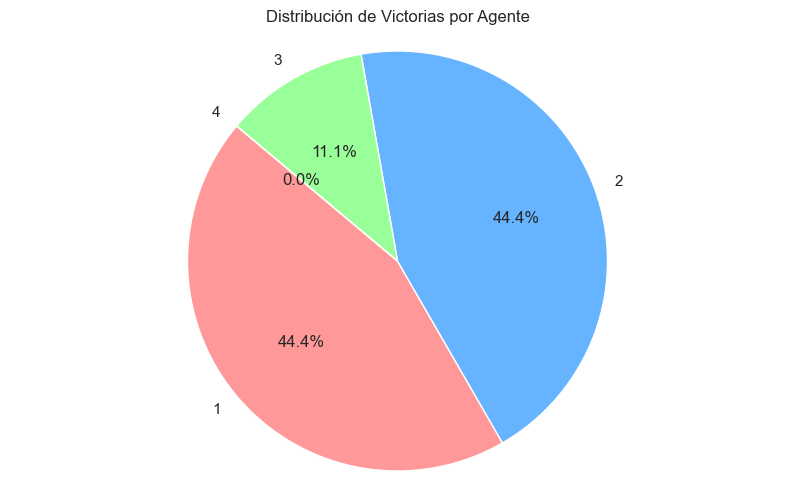

In [117]:
labels = all_agents_victories['Agent']
sizes = all_agents_victories['Victories']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

plt.title('Distribución de Victorias por Agente')

plt.show()

Podemos observar que el Agente 1 y 2 son los que mas victorias han obtenido. El agente 4 no ha conseguido ninguna victoria, por lo que en partidas ganadas Q-Learning ha obtenido mejores resultados que MCTS.

In [118]:
avg_captured_whites = df.groupby('agent_white')['chess_pieces_blacs'].mean()
avg_captured_blacks = df.groupby('agent_black')['chess_pieces_whites'].mean()

avg_captured_df = pd.DataFrame({'Agent': unique_agents})
avg_captured_df['Avg_Captured_as_White'] = avg_captured_df['Agent'].map(avg_captured_whites).fillna(0)
avg_captured_df['Avg_Captured_as_Black'] = avg_captured_df['Agent'].map(avg_captured_blacks).fillna(0)

avg_captured_df

,Agent,Avg_Captured_as_White,Avg_Captured_as_Black
0,1,4.75,0.0
1,2,6.20,0.0
2,4,0.00,7.5
3,3,0.00,2.8


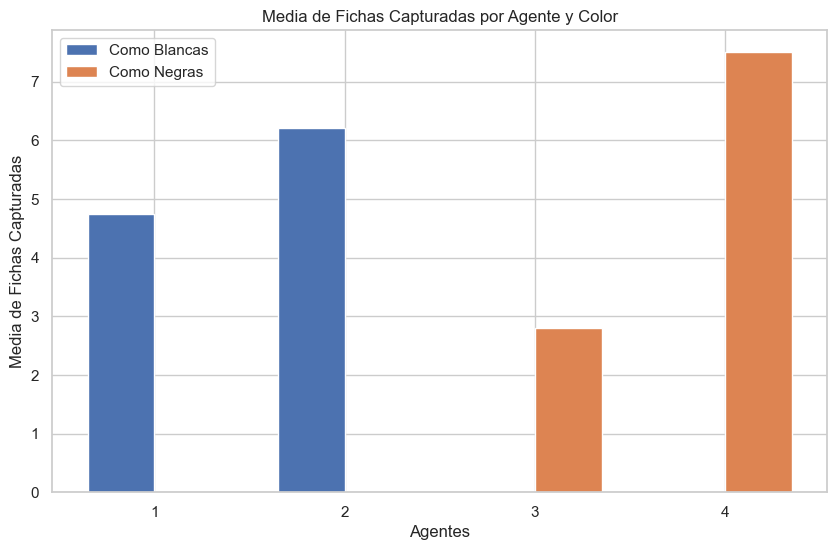

In [121]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = avg_captured_df['Agent']

bar1 = ax.bar(index - bar_width/2, avg_captured_df['Avg_Captured_as_White'], bar_width, label='Como Blancas')
bar2 = ax.bar(index + bar_width/2, avg_captured_df['Avg_Captured_as_Black'], bar_width, label='Como Negras')

ax.set_xlabel('Agentes')
ax.set_ylabel('Media de Fichas Capturadas')
ax.set_title('Media de Fichas Capturadas por Agente y Color')
ax.set_xticks(index)
ax.set_xticklabels(avg_captured_df['Agent'])
ax.legend()

plt.show()

En este caso los Agentes de MCTS son los que más fichas han capturado frente a Q-Learning.

In [123]:
combined_times = pd.concat([
    df[['agent_white', 'average_time_whites']].rename(columns={'agent_white': 'agent', 'average_time_whites': 'average_time'}),
    df[['agent_black', 'average_time_blacks']].rename(columns={'agent_black': 'agent', 'average_time_blacks': 'average_time'})
])

avg_total_time = combined_times.groupby('agent')['average_time'].mean()

avg_total_time_df = pd.DataFrame({'Agent': unique_agents, 'Avg_Total_Time': avg_total_time}).reset_index(drop=True)

avg_total_time_df


,Agent,Avg_Total_Time
0,1,0.000407
1,2,1.589340
2,4,0.000400
3,3,1.521452


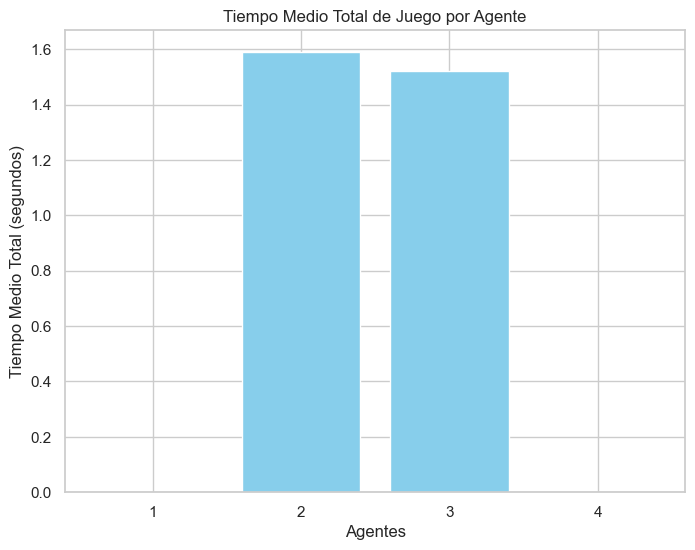

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(avg_total_time_df['Agent'], avg_total_time_df['Avg_Total_Time'], color='skyblue')

ax.set_xlabel('Agentes')
ax.set_ylabel('Tiempo Medio Total (segundos)')
ax.set_title('Tiempo Medio Total de Juego por Agente')
ax.set_xticks(avg_total_time_df['Agent'])  

plt.show()

En este caso el tiempo de los Agentes de Q-Learning son muy pequeños frente a los de MCTS por lo que no son representados en la gráfica.

### Conclusiones

Hemos podido observar como los Agentes de Q-Learning han ganado más partidas que los de MCTS, pero a su vez tienen una menor media de fichas capturas y un menor tiempo de juego. Por lo que podemos concluir que los Agentes de Q-Learning son más eficientes que los de MCTS.